In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Datascience_Course/Expert/Project/NVIDIA.csv")
df.sample(2)

,Date_,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
3527,2024-01-09,53.124939,54.309604,51.675349,52.386150,773100000
504,2012-01-03,0.321897,0.330151,0.321209,0.327858,468044000


In [4]:
# !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.7 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import streamlit as st


In [8]:
df['Date_'] = pd.to_datetime(df['Date_'])
df.set_index('Date_', inplace=True)

# Select target column (Close Price)
data = df[['Close_NVDA']].values


In [9]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [10]:
# Create sequences (LSTM input)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Using 60 days of past data
X, y = create_sequences(data_scaled, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [34]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

# Define the optimized LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),

    Dense(1)  # Single output for regression
])

# Compile the model with Huber loss
model.compile(optimizer=Adam(learning_rate=0.0005), loss=Huber(delta=1.0))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,  # Increased epochs for better training
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 3.8451 - val_loss: 2.5396 - learning_rate: 5.0000e-04
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4569 - val_loss: 1.6936 - learning_rate: 5.0000e-04
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.6761 - val_loss: 1.1640 - learning_rate: 5.0000e-04
Epoch 4/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1867 - val_loss: 0.8324 - learning_rate: 5.0000e-04
Epoch 5/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8747 - val_loss: 0.6244 - learning_rate: 5.0000e-04
Epoch 6/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6650 - val_loss: 0.4897 - learning_rate: 5.0000e-04
Epoch 7/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5407 - val_loss: 0.4005 - learning_rate: 5.0000e-04
Epoch 8/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4446 - val_loss: 0.3375 - learning_rate: 5.0000e-04
Epoch 9/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3861 - val_loss: 0.2974 - learning_rate: 5.000

In [42]:
model.summary() # Call summary on the model object instead of the history object

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 60, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 60, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 745,413 (2.84 MB)

 Trainable params: 248,257 (969.75 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 496,516 (1.89 MB)

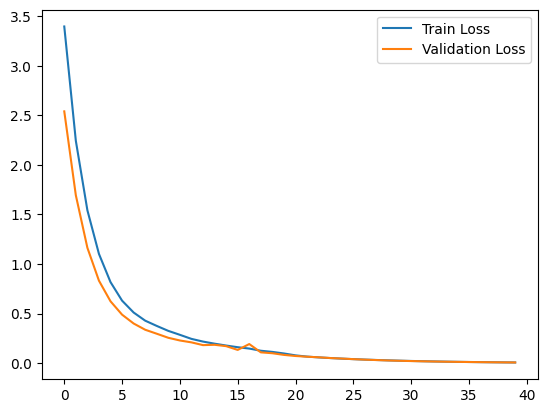

In [35]:
# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Model evaluation
y_pred = model.predict(X_test)
# Reshape y_pred before inverse scaling
y_pred = y_pred[:, -1, :]  # Get the last output from the LSTM for each sequence

y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE: 28.07945238893858, MAE: 3.385143559620562, RMSE: 5.2990048489257475, R2 Score: 0.9854554836458447


In [38]:
# prompt: Create a dataframe of y_test_actual and y_pred

import pandas as pd

# Assuming y_test_actual and y_pred are already defined from your previous code
# Create a DataFrame
results_df = pd.DataFrame({'y_test_actual': y_test_actual.flatten(), 'y_pred': y_pred.flatten()})

# Now you have a DataFrame called results_df with your data.
# You can display it or perform further operations on it.
results_df


,y_test_actual,y_pred
0,26.660656,25.529716
1,25.781120,25.955006
2,23.909237,26.390512
3,24.226707,26.628008
4,26.451008,26.684534
...,...,...
742,118.419998,147.361832
743,128.990005,146.868256
744,123.699997,145.117081
745,124.650002,142.444717


In [40]:
# Save model
model.save("/content/drive/MyDrive/Datascience_Course/Expert/Project/stock_lstm_model.keras")

In [ ]:
# # Load model
# loaded_model = load_model("/content/drive/MyDrive/Datascience_Course/Expert/Project/stock_lstm_model.keras")

In [ ]:

# # Streamlit Deployment
# def run_app():
#     st.title("Stock Price Prediction with LSTM")
#     user_input = st.number_input("Enter Last 60 Days Prices (Comma-separated):", key="input")
#     if st.button("Predict"):
#         input_data = np.array([float(i) for i in user_input.split(',')]).reshape(-1, 1)
#         input_data_scaled = scaler.transform(input_data)
#         input_data_scaled = input_data_scaled.reshape(1, seq_length, 1)
#         prediction = loaded_model.predict(input_data_scaled)
#         predicted_price = scaler.inverse_transform(prediction)[0][0]
#         st.write(f"Predicted Next Day Price: ${predicted_price:.2f}")

# if __name__ == "__main__":
#     run_app()
